## Models Makes and Accident Rates: Which Aircraft is Safest?

* Student name: Ariella Cerasuolo 
* Student pace: Self paced
* Scheduled project review date/time: Monday, December 11th, 2023 @1:00pm
* Instructor name: Morgan Jones
* Blog post URL: https://www.blogger.com/blog/post/edit/4908376541306918343/1322238248945680013?hl=en


#  What Makes a Safe Flight?

Given the nature of aviation, it is acknowledged that complete risk elimination is not feasible. However, the primary focus of this project is to explore strategies for minimizing risk by prioritizing passenger safety. The overwhelming importance of passenger safety in the business's decision-making is taken into account, recognizing that a fatal accident could have severe repercussions on the company's reputation and financial stability.

This analysis specifically aims to provide recommendations on:

1. Makes and models of airplanes with the lowest percentages of injuries

2. Engine type and number of engines and whether or not it contributes to safety using the data provided

3. Weather conditions and how they contribute to accident rates

Obviously there are other factors that can determine a safe or unsafe flights, but these listed are, in my opinion, the most important

## The Dataset Provided

This dataset is provided by the 'National Transportation Safety Board' which includes aviation accident data from 1948 to 2023.
It is comprised of information on civil aviation accidents occurring in the United States and international waters. 

## Understanding the Dataset and How it's Accessed
First we need to import all the necessary tools:

1. *Pandas*, which allows us to read the file
2. *Numpy*, for data manipulation and filtering (in this case "Cleaning")
3. *MatPlotLib*, for visulization
4. *MatPlotLib Inline*, to display interactive plots directly in the cells.

In [1]:
#Import Pandas, NumPy, MatPlotLib, as well as set MatPlotLib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Next we need to read the file and assign it the variable *df* and look at the first 10 rows to see that its running.

In [2]:
#Check first 20 rows of data using .head()
df = pd.read_csv("data/Aviation_Data.csv")
df.head()

C:\Users\ariel\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Now, we'll deal with missing data.

The first step is to see what columns have missing data.

How much data is missing from each column?

In [3]:
#Check for the number of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

As we can see here, most of the columns are missing well over 1000 rows of data.

Our best bet is to drop unnecessary columns and to clean up rows!

## Dropping Unnecessary Columns

As stated before, I am making reccomendations based off 3 things:

1. Makes and models of airplanes with the lowest percentages of injuries

2. Safety protocals and proper maintenance checks provided by which companies

3. Weather conditions and how they contribute to fatality rates

Now lets get into what needs to be dropped and why.

To start, with only 90348 rows in all, any column missing more than half of it's data might be considered useless depending on just how important the column is.

Lets determine which columns this issue pertains to.

In [4]:
#Set the "threshold" for checking if a column is missing half (0.5) it's data
threshold = 0.5 

#Check the percentage of missing values for each column
missing_percentage = (df.isnull().mean())

#Identify columns with more than half of their data missing and label it DHM_columns (Data Half Missing)
DHM_columns = missing_percentage[missing_percentage > threshold].index.tolist()

print(DHM_columns)


['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier']


The columns listed above are all missing *more* than half their data (**'Latitude', 'Longitude', Aircraft.Category', 'FAR.Description', 'Schedule', Air.carrier**)

Because "**Aircraft.Category**" is what *type* of aircraft, (jet, hot air balloon, etc.), we will deal with it in the "cleaning rows" section.

All else is does not help in deciphering the risks of each aircraft so they can be dropped

In [5]:
#Drop above list
df.drop(['Latitude', 'Longitude',  
         'FAR.Description',
        'Schedule', 'Air.carrier'],
        axis=1, inplace=True)

In [6]:
#Check sum of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: int64

Other Unnecessary columns include:

1. **Event.Id**: Since this is specific to each individual flight rather than a make, model or airport, it wont help our search.
2. **Accident.Number**: This is also a column that is specific to each individual flight.
3. **Registration.Number**: Once again flight specific so we are unable to use it properly.
4. **Report.Status**:Most of entries in this column are labeled "Probable Cause". Because of the lack of information that this column provides, it'll be dropped.
5. **Publication.Date**: This does not add to the "risk-factor" so it's not needed for our research.
6. **Airport.Code**: Although Airport can have something to do with risk factor, seeing as we dont have the information required to determine the probable cause (Pilot, Protocals, ect). it will be dropped
7. **Airport.Name**: Same reasoning as **Airport.Code**
8. **Purpose.of.Flight**: Seeing as whether or not the flight was "Business" or "Personal" doesnt add to the risk factor, it can be dropped.

In [7]:
#Drop the list above and remove the variables (columns) completely
df.drop(['Event.Id', 'Accident.Number', 'Registration.Number', 'Purpose.of.flight', 
          'Airport.Code', 'Airport.Name', 'Report.Status', 'Publication.Date'],
        axis=1 , inplace=True)

In [8]:
#Check sum of missing values
df.isna().sum()

Investigation.Type            0
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64

Now that we have all the columns we need, it's time to drop rows within specific columns.

## Cleaning Make and Model 

Since our most important rows stem from **Models**, **Makes** and type of **Aircraft**, the empty rows in those columns, as well as anything that is not an *airplane*, will be the ones we clean first.

First I want to create a column called **Make.and.Model**, so that we can compare all data that's supposed to be labeled with the value *Airplane* within the **Aircraft.Category** to this new column and fill it in.

In [9]:
#Create a new column with Make and Model together
df['Make.and.Model'] = (df['Make'].str.upper() + " " + df['Model'].str.upper())
df.head(20)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,CESSNA 180
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,CESSNA 140
8,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,CESSNA 401B
9,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B


Next i want to find the values that correspond with *Airplane* in **Make.and.Model** and assign it to a variable.

In [10]:
#Find values in 'Make and Model' corresponding to 'Airplane' in 'Aircraft.Category'
airplane_make_models = df.loc[df['Aircraft.Category'] == 'Airplane', 'Make.and.Model'].unique()

#Convert the unique values to a Python list
airplane_make_models_list = airplane_make_models.tolist()

#Print the corresponding values
print("\nMake values corresponding to 'Airplane':")
for make_model in airplane_make_models_list:
    print(make_model)


Make values corresponding to 'Airplane':
MCDONNELL DOUGLAS DC9
CESSNA 140
CESSNA 401B
BELLANCA 17-30A
CESSNA R172K
NAVION A
BEECH 19
CESSNA 180
CESSNA 172
CESSNA 152
CESSNA 150L
PIPER PA-24-180
GRUMMAN AA-5B
CESSNA 414A
BEECHCRAFT BE-58
MAULE M-5-235C
CESSNA 210L
BELLANCA 7GCBC
CESSNA 182
AIR TRACTOR AT-301
PIPER PA-28-161
PIPER PA-34-200T
CESSNA T337G
PIPER PA-28R-200
CESSNA 206
PIPER PA-22
PIPER PA-31
ROCKWELL 114
PIPER PA-24-250
CESSNA TR182
CESSNA A185F
CESSNA 340
BEECH 35
MOONEY M-20J
BOEING A75
CESSNA 210
BEECH V35
CURTIS C46
CESSNA 172M
PIPER PA-28-140
CESSNA TU206G
CESSNA 172N
CESSNA P210N
PIPER PA-34
CESSNA 305 (L-19)
CESSNA 182A
PIPER PA-23-250
PIPER 23-250
MOONEY M20G
CESSNA TU206F
QUICKIE 1
CESSNA U206
CESSNA 210N
CESSNA 310L
LOCKHEED L-1011
EMBRAER EMB-110P1
CESSNA 414
BEECH P35
GRUMMAN AA5B
PIPER PA-28R-201T
BEECH A23-24
PIPER PA-31-350
CESSNA T210N
SWEARINGEN SA 226-TC
BEECH C-45H
DE HAVILLAND DHC-2-MK3
CESSNA 150M
BEDE AIRCRAFT BD-5B
CESSNA 182P
CONVAIR 440
PIPER PA-31

NORTH AMERICAN T6-G
HAWKER BEECHCRAFT CORPORATION B200
BEECH 1900 - D
YOUNKIN J R MULLICOUPE
AMERICAN CHAMPION AIRCRAFT 8GCBC
AUGUSTINE DAVID L SONEX
AIR GULFSTREAM AIRLINES INC SX-300
ENGLISH ELECTRIC LIGHTNING MK T5
AIRBUS A319-111
ROBERT WOOD THORP T18
CLASSIC AIRCRAFT CORP WACO YMF
PARADISE USA LLC PARADISE P-1 SLSA LW
CESSNA C185F
BUDD LANCAIR LEGACY
NEPHEW ALAN H KITFOX
KRUSMARK DAVID HOMER SEAREY
TAIL FEATHER LLC SEA REY
COX BUSBY MUSTANG
MAHRE STARDUSTER SA300
CURTISS WRIGHT TRAVEL AIR 4000
PILATUS BRITTEN-NORMAN BN-2B-26
NEW PIPER AIRCRAFT INC PA-46-500TP
EMBRAER EMB135
HUBER HARTMUT EXPRESS
BOEING MD
EADS SOCATA TBM 700
BOMBARDIER CL600 2C10
BOMBARDIER DHC-8
FPNA LLC A-22 VALOR
DAVIS MICHAEL J LONGEZ
ATR ATR72
LYMAN RANDALL/SCOTT DAVID AVID FLYER
HOOVER FRANK RV-8
FAIRCHILD SA227
HAWKER BEECHCRAFT CORP. 200
DOUGLAS DC8
LARSON RV8
DASSAULT FALCON 20C
ENGINEERING & RESEARCH ERCOUPE 415-CD
AIRBUS INDUSTRIE A319-131
YOUNG DEE C KITFOX II
FOSTER JOHN GLASAIR III
QUAD CITY CHALLENG

DAVIDSON, RONALD A. AVID
PIPER PA 14
REIMS F172N
JAMES DONALD BAKER ZENITH
M-SQUARED AIRCRAFT SPRINT 1000
AYRES CORPORATION S2R G10
GARCIA BENIGNO BABY ACE D
JAMES WIEBE BELITE PIPPER
AMERICAN AA
AVID AVID FLYER
DEVRIES WM H KITFOX SPORT
MORRISON MARVIN E JR RV 6A
ELDRIDGE GEORGE SKYSTAR KITFOX SER 7
LITE FLIGHT DRAGONFLY
AERONCA 58B
JIM GREEN CCX
IRLBECK THOMAS H RV 8
NORTH AMERICAN SNJ 2
SORENSEN DANNY S BF9 2
MASON HAL J KITFOX MODEL 1
GIPPSAERO PTY LTD GA10
DOBBS GEORGE COOT
BRYAN C L/LABRASH R D SEAREY
AEROVODOCHODY L 29 DELFIN
BOEING 737 800
DAN JELINEK BACKCOUNTRY SUPERCUB
DORNIER GMBH ALPHA JET
RGJ AVIATION LLC JOHNSON AIR CAM
EMBRAER ERJ175
JABIRU J250
JABIRU USA SPORT AIRCRAFT LLC J250
CRAIG A REED STARDUSTER II
ZENITH STOL CH701
ERCOUPE 415 D
CRAWFORD RV-7
DASSAULT FALCON7X
AEROPRAKT A-22 VALOR
TRAVEL AIR 2000
BOEING 737 300
ZENAIR ZENITH STOL CH 701
ROBERT MILES SMITH TRIKE
COLUMBIA LC41-550FG
SWEARINGEN SX300
EVEKTOR AEROTECHNIK SPORTSTAR
NORTH AMERICAN AT
CHAMPION 8GCBC
B

As I suspected, its an incredibly long list, which is why we assigned it to a variable.

Next, I want to fill in the values that should be labeled "Airplane" based off "Make and Model" data.

In [11]:
#Fill 'Aircraft.Category' column with 'Airplane' for Make and Model values
df['Aircraft.Category'] = df.apply(lambda row: 'Airplane' if pd.isna(row['Aircraft.Category']) and row['Make.and.Model'] in airplane_make_models else row['Aircraft.Category'], axis=1)

#Print the first 20 rows
df.head(20)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Airplane,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,CESSNA 180
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,CESSNA 140
8,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,CESSNA 401B
9,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B


Lets check what missing data is left.

In [12]:
#Check the sum
df.isna().sum()

Investigation.Type            0
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         17571
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Make.and.Model             1571
dtype: int64

That should definently help in the decision making process.

I'm going to fill The rest of the "NaNs" with the value "Unknown"

In [13]:
#Fill NaN values with "Unknown"
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

Now, the only independent column so far that requires having absolutely no missing data is **Make and Model**, were going to remove all NaN values.

In [14]:
#Drop NaN values from "Make and Model"
df.dropna(subset=['Make.and.Model'], inplace=True)

Let's check one more time for now!

In [15]:
#Check the sum
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Make.and.Model                0
dtype: int64

## Passengers Injured and Aircraft Damage

Next were going to filter through all the "Injuries" data and start working towards our goal of picking the safest aircraft.
A few things I want to do here.
1. Find missing data
2. Find the total number of passenger on each flight 
3. Make a new column for total number of passengers 
4. Make a new column for passengers and damage and clear all NaN data 

In [16]:
# Filtering rows with missing values in specific columns
incomplete_entries = df[ df['Total.Fatal.Injuries'].isna() | 
    df['Total.Serious.Injuries'].isna() | 
    df['Total.Minor.Injuries'].isna() | 
    df['Total.Uninjured'].isna()]

#Print the first few rows
incomplete_entries.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
89,Accident,1982-01-15,"BUTLER, PA",United States,Non-Fatal,Substantial,Airplane,Cessna,310,No,2.0,Reciprocating,NaN,NaN,NaN,2.0,VMC,Approach,CESSNA 310
260,Accident,1982-02-07,"MARTHAS VINEYARD, MA",United States,Non-Fatal,Substantial,Airplane,Bellanca,7KCAB,No,1.0,Reciprocating,NaN,NaN,NaN,2.0,VMC,Landing,BELLANCA 7KCAB


In [17]:
#Found the entries that were missing data and had a value of 0
incomplete_entries[(incomplete_entries['Total.Fatal.Injuries'] == 0) | \
                  (incomplete_entries['Total.Serious.Injuries'] == 0) | \
                  (incomplete_entries['Total.Minor.Injuries'] == 0) | \
                  (incomplete_entries['Total.Uninjured'] == 0)]

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
7338,Accident,1984-01-30,"GREENSBORO, NC",United States,Fatal(2),Destroyed,Airplane,Cessna,P210N,No,1.0,Reciprocating,2.0,0.0,2.0,NaN,IMC,Approach,CESSNA P210N
18229,Accident,1987-07-26,"LEVELOCK, AK",United States,Non-Fatal,Substantial,Airplane,Piper,PA-18-150,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Landing,PIPER PA-18-150
44807,Accident,1998-09-02,"NOVA SCOTIA, Canada",Canada,Fatal(229),Destroyed,Unknown,Douglas,MD-11,No,NaN,Unknown,229.0,0.0,0.0,NaN,UNK,NaN,DOUGLAS MD-11
49565,Accident,2000-10-18,"JESUP, GA",United States,Non-Fatal,Substantial,Airplane,Piper,PA-28-161,No,1.0,Reciprocating,0.0,0.0,2.0,NaN,VMC,Taxi,PIPER PA-28-161
49654,Accident,2000-11-02,"RIDGEFIELD, CT",United States,Non-Fatal,Destroyed,Airplane,Cessna,172N,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Takeoff,CESSNA 172N
49757,Accident,2000-11-28,"TYLER, TX",United States,Fatal(2),Substantial,Unknown,Landes/karich/schmidt,CHRISTEN EAGLE II,Yes,1.0,Reciprocating,2.0,0.0,0.0,NaN,VMC,Maneuvering,LANDES/KARICH/SCHMIDT CHRISTEN EAGLE II
50072,Accident,2001-02-08,"AUGUSTA, GA",United States,Non-Fatal,Substantial,Airplane,Cessna,210M,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Approach,CESSNA 210M
50309,Accident,2001-04-02,"SMITHFIELD, NC",United States,Fatal(1),Substantial,Unknown,Jacques J. Mistrot,Skybolt,Yes,1.0,Reciprocating,1.0,0.0,0.0,NaN,VMC,Takeoff,JACQUES J. MISTROT SKYBOLT
50581,Accident,2001-05-18,"Julian, CA",United States,Fatal(2),Destroyed,Unknown,Beech,D45,No,1.0,Reciprocating,2.0,0.0,0.0,NaN,VMC,Maneuvering,BEECH D45


In [18]:
#Filled all missing values with 0 
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [19]:
#Found the entires for which all of the columns related to injury are 0
all_zero_entries = df.loc[(df['Total.Fatal.Injuries'] == 0) & \
                  (df['Total.Serious.Injuries'] == 0) & \
                  (df['Total.Minor.Injuries'] == 0) & \
                  (df['Total.Uninjured'] == 0)]

In [20]:
#Dropped zero entries from the Data
df.drop(all_zero_entries.index, inplace=True)

In [21]:
df.head(20)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,CESSNA 172M
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,0.0,0.0,VMC,Approach,CESSNA 501
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Airplane,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,CESSNA 180
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,CESSNA 140
8,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,CESSNA 401B
9,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,Unknown,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B


In [22]:
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Location                     42
Country                     222
Injury.Severity               0
Aircraft.damage            2583
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                63
Number.of.Engines          5112
Engine.Type                6060
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3377
Broad.phase.of.flight     25829
Make.and.Model                0
dtype: int64

In [23]:
#Found total number of passengers by calling the number of injured/uninjured
df['Total.Number.of.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + \
                                  df['Total.Minor.Injuries'] +  df['Total.Uninjured'])

Now that we''ve dealt passengers, let's move onto the damage done to each aircraft.

In [24]:
#Fill in NaN values with "Unknown"
df['Aircraft.damage'] = df['Aircraft.damage'].fillna("Unknown")

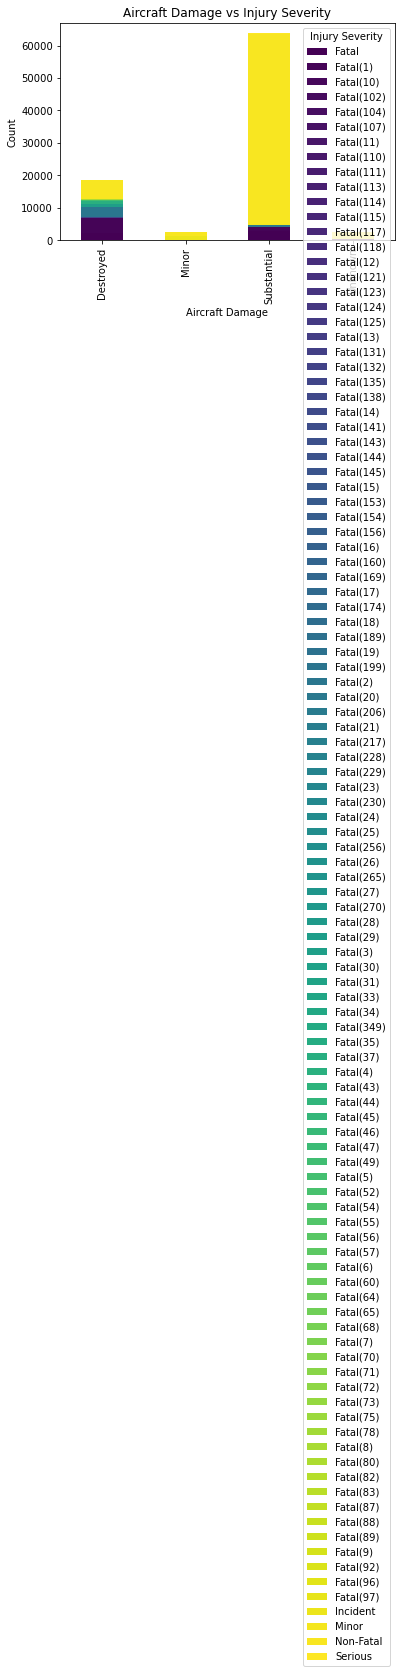

In [25]:
#Count the occurrences of each combination
count_df = df.groupby(['Aircraft.damage', 'Injury.Severity']).size().reset_index(name='Count')

#Pivot the table for better visualization
pivot_df = count_df.pivot(index='Aircraft.damage', columns='Injury.Severity', values='Count').fillna(0)

#Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

#Add labels and title
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.title('Aircraft Damage vs Injury Severity')
plt.legend(title='Injury Severity', loc='upper right')
plt.show()

## Unknown Fillers

Within a few of the columns, we have unknown values that we cant do much else with except to fill in with "unknown".
The reason for this is because even though they arent that impotant of factors, some rowsmight just be considered important enough as "outliers" or as a way to complete the data.

1. **Location and Country**: Even though they might not be important for the majority of the data, we have to consider that they might factor into **Weather Conditions**.
2. **Amateur Built**: Amateur Built can tell us whether or not the quality of certain planes is or, more importantly, is not effected by who built it. This column may end up being completely useless but "No stone unturned".

In [26]:
#Create a variable to assign to the columns
Fillers = ['Location', 'Country', 'Amateur.Built']

#Fill in NaN values with "Unknown"
df[Fillers] = df[Fillers].fillna("Unknown")

In [27]:
#Print sum missing values
df.isna().sum()

Investigation.Type                0
Event.Date                        0
Location                          0
Country                           0
Injury.Severity                   0
Aircraft.damage                   0
Aircraft.Category                 0
Make                              0
Model                             0
Amateur.Built                     0
Number.of.Engines              5112
Engine.Type                    6060
Total.Fatal.Injuries              0
Total.Serious.Injuries            0
Total.Minor.Injuries              0
Total.Uninjured                   0
Weather.Condition              3377
Broad.phase.of.flight         25829
Make.and.Model                    0
Total.Number.of.Passengers        0
dtype: int64

## Weather Conditions and Broad Phase of Flight

First I wat to assign all **NaN** values within these two columns to "Unknown".

In [28]:
weather_and_broad_phase = ['Weather.Condition', 'Broad.phase.of.flight']

#Fill in NaN values with "Unknown"
df[weather_and_broad_phase] = df[weather_and_broad_phase].fillna("Unknown")

Now I want to know

In [29]:
# Filter data for IMC and VMC accidents
imc_accidents = df[df['Weather.Condition'] == 'IMC']
vmc_accidents = df[df['Weather.Condition'] == 'VMC']

In [30]:
#Count the fatal and non-fatal accidents for IMC
imc_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal']
imc_non_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal']
#Count the fatal and non-fatal accidents for VMC
vmc_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal']
vmc_non_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal']


#Get the counts
num_imc_non_fatal = len(imc_non_fatal)
num_imc_fatal = len(imc_fatal)
num_vmc_non_fatal = len(vmc_non_fatal)
num_vmc_fatal = len(vmc_fatal)

print("Number of fatal accidents under IMC:", num_imc_fatal)
print("Number of non-fatal accidents under IMC:", num_imc_non_fatal)
print("Number of fatal accidents under VMC:", num_vmc_fatal)
print("Number of non-fatal accidents under VMC:", num_vmc_non_fatal)

Number of fatal accidents under IMC: 609
Number of non-fatal accidents under IMC: 2275
Number of fatal accidents under VMC: 3175
Number of non-fatal accidents under VMC: 62865


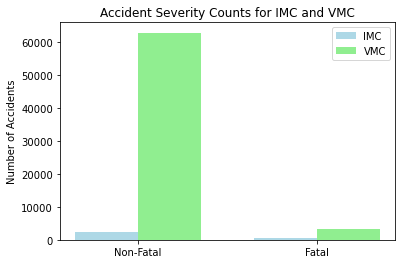

In [31]:
# Counts for IMC
imc_counts = {
    'Non-Fatal': num_imc_non_fatal,
    'Fatal': num_imc_fatal
}

# Counts for VMC
vmc_counts = {
    'Non-Fatal': num_vmc_non_fatal,
    'Fatal': num_vmc_fatal
}

# Plotting
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
bar_positions_imc = range(len(imc_counts))
bar_positions_vmc = [pos + bar_width for pos in bar_positions_imc]

# Bar plots with custom colors light blue for IMC, light green for VMC)
ax.bar(bar_positions_imc, imc_counts.values(), width=bar_width, label='IMC', color='lightblue')
ax.bar(bar_positions_vmc, vmc_counts.values(), width=bar_width, label='VMC', color='lightgreen')

# X-axis ticks and labels
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_imc])
ax.set_xticklabels(imc_counts.keys())

# Labeling
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Severity Counts for IMC and VMC')
ax.legend()

# Show the plot
plt.show()

In [32]:
#found all values in the phase of flight column
df['Broad.phase.of.flight'].value_counts()

Unknown        26373
Landing        15421
Takeoff        12481
Cruise         10263
Maneuvering     8138
Approach        6537
Climb           2030
Taxi            1958
Descent         1886
Go-around       1353
Standing         939
Other            119
Name: Broad.phase.of.flight, dtype: int64

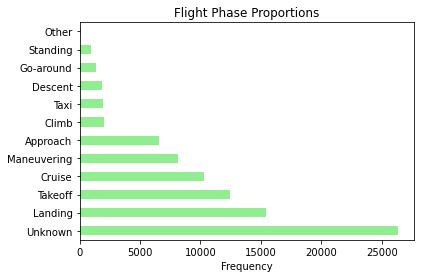

In [33]:
#Create a bar graph
df['Broad.phase.of.flight'].value_counts().plot(kind='barh', color='lightgreen')

#Labeling
plt.xlabel("Frequency")
plt.title("Flight Phase Proportions")

#Show plot
plt.show()


## Engines and Their Effect

Now we'll look at the effect engines have on a plane and whether or not it can contribute to the crash.

In [34]:
#Create a variable to assign to the columns
Fillers = ['Number.of.Engines', 'Engine.Type']

#Fill in NaN values with "Unknown"
df[Fillers] = df[Fillers].fillna("Unknown")

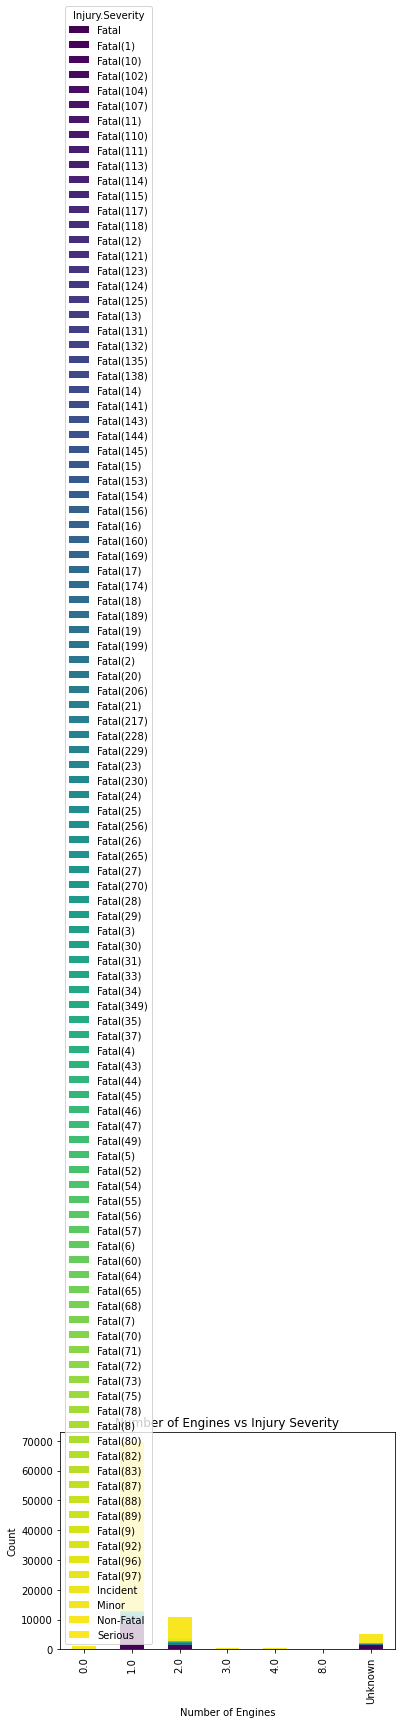

In [35]:
# Count the occurrences of each combination
count_df = df.groupby(['Number.of.Engines', 'Injury.Severity']).size().reset_index(name='Count')

# Pivot the table for better visualization
pivot_df = count_df.pivot(index='Number.of.Engines', columns='Injury.Severity', values='Count').fillna(0)

# Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.title('Number of Engines vs Injury Severity')
plt.show()

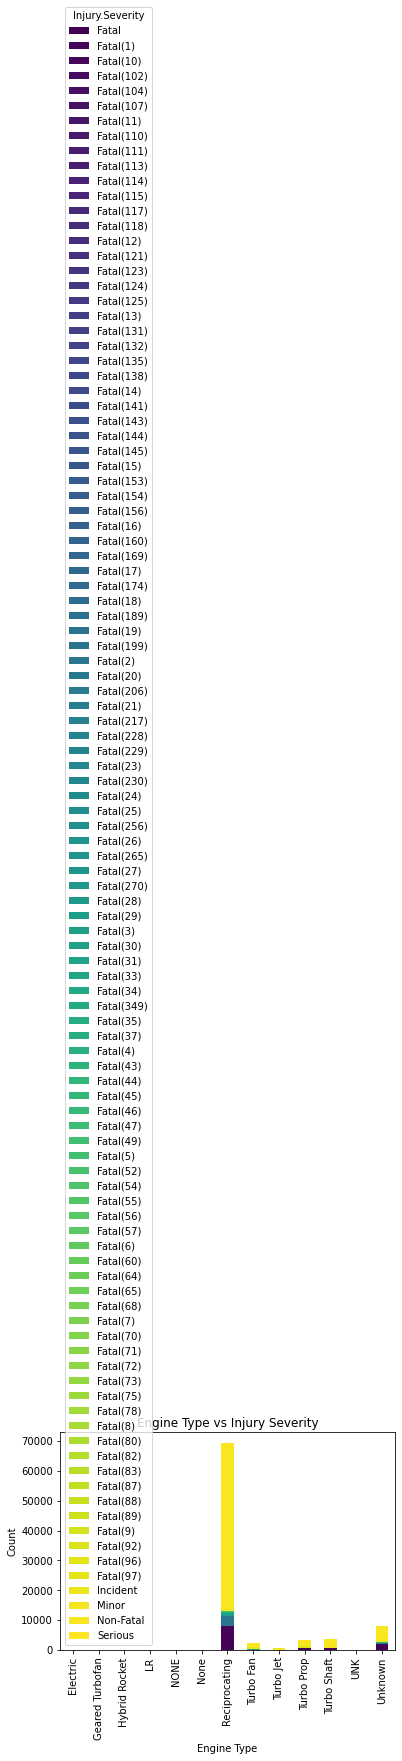

In [36]:
# Count the occurrences of each combination
count_df = df.groupby(['Engine.Type', 'Injury.Severity']).size().reset_index(name='Count')

# Pivot the table for better visualization
pivot_df = count_df.pivot(index='Engine.Type', columns='Injury.Severity', values='Count').fillna(0)

# Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Engine Type vs Injury Severity')
plt.show()

In [37]:
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Make.and.Model                0
Total.Number.of.Passengers    0
dtype: int64

In [38]:
#found the total number of entries in the dataset
print(len(df))

#used the .describe() method to get summary statistics of the dataset
df.describe()

87498


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.of.Passengers
count,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000
mean,0.572745,0.243960,0.313779,5.040767,6.171250
std,5.166142,1.445097,2.099669,27.193009,28.039978
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000,699.000000


## Recommendations (Closing Statement)

I want to go through the Makes and Models based off our cleaned data and give recommendations off the final results.

In [39]:
# Select relevant columns
selected_columns = ['Make.and.Model', 'Aircraft.damage', 'Injury.Severity', 'Weather.Condition', 'Broad.phase.of.flight', 'Number.of.Engines']

# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Drop rows with missing values
selected_df = selected_df.dropna()

# Convert 'Aircraft.damage' to numerical values for comparison
damage_mapping = {'Substantial': 2, 'Minor': 1, 'Destroyed': 3}
selected_df['Aircraft.damage'] = selected_df['Aircraft.damage'].map(damage_mapping)

# Convert 'Injury.Severity' to numerical values for comparison
injury_mapping = {'Minor': 1, 'Serious': 2, 'Fatal': 3}
selected_df['Injury.Severity'] = selected_df['Injury.Severity'].map(injury_mapping)

# Group by 'Make.and.Model' and calculate the sum for each group
grouped_df = selected_df.groupby('Make.and.Model').sum()

# Sort the DataFrame by least amount of damage and injuries
sorted_df = grouped_df.sort_values(by=['Aircraft.damage', 'Injury.Severity'], ascending=[True, True])

# Display the result (top row has the least amount of damage and injuries)
result = sorted_df.head(10)
print(result)

                          Aircraft.damage  Injury.Severity
Make.and.Model                                            
ADAMS A-60                            0.0              0.0
ADAMS AX-9                            0.0              0.0
ADAMS UNKNOWN                         0.0              0.0
AERO COMMANDER 690C                   0.0              0.0
AERO DESIGNS PULSAR                   0.0              0.0
AEROSPATIALE AS 355 F                 0.0              0.0
AEROSPATIALE AS-365-N2                0.0              0.0
AEROSPATIALE ATR 42-300               0.0              0.0
AEROSPATIALE ATR 72-212               0.0              0.0
AEROSPATIALE ATR-42-2000              0.0              0.0


Based off the data above, here are the top 10 (in order) that I recommend:
    1. ADAMS A-60                           
    2. ADAMS AX-9                           
    3. ADAMS UNKNOWN                         
    4. AERO COMMANDER 690C                   
    5. AERO DESIGNS PULSAR                   
    6. AEROSPATIALE AS 355 F                 
    7. AEROSPATIALE AS-365-N2                
    8. AEROSPATIALE ATR 42-300               
    9. AEROSPATIALE ATR 72-212               
   10. AEROSPATIALE ATR-42-2000 

My lack of visuals in Jupyter will be made up for in Tableau, No its time to re-assign the dataset and close it for further use.

In [41]:
df.to_csv('data/Aviation_Data_Cleaned.csv')